In [112]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [143]:
files = glob.glob('/Users/jane/Desktop/data-to-use/*.csv')

In [144]:
def get_cat_name(string):
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name

In [180]:
for f in files:
    df = pd.read_csv(f)
df.dropna(subset=['categories'], inplace=True)
indexNames = df[df['categories'] == '[]'].index
df.drop(indexNames, inplace=True)

df_head()

#Before and during COVID pandemic 
df_corona = df[(df['months']  >= 1) & (df['years']==2020)] 
df_before = df[(df['months']  <= 12) & (df['years']==2019)]

df_totals = df_corona.groupby(['months', 'categories']).count().reset_index()
renamed = df_totals.rename(columns={'Unnamed: 0':'total'})
dropped = renamed[['months', 'categories', 'total']]

df_totals_before = df_corona.groupby(['months', 'categories']).count().reset_index()
before_renamed = df_totals_before.rename(columns={'Unnamed: 0':'total'})
before_dropped = renamed[['months', 'categories', 'total']]  


In [182]:
print(before_dropped)

     months                                         categories  total
0         1                                         ['Comedy']     10
1         1                                      ['Education']      4
2         1                                  ['Entertainment']     90
3         1                               ['Film & Animation']     11
4         1                                         ['Gaming']      1
5         1                                  ['Howto & Style']      9
6         1                                          ['Music']    294
7         1                                ['News & Politics']     14
8         1                                 ['People & Blogs']     71
9         1                                         ['Sports']     19
10        1                                ['Travel & Events']      7
11        1    [['/Arts & Entertainment', 0.5099999904632568]]      1
12        1    [['/Arts & Entertainment', 0.5199999809265137]]      1
13        1    [['/A

In [183]:
categories = dropped['categories'].to_list()
before_categories = before_dropped['categories'].to_list()

temp_lst = []
before_temp_lst = []

for e in categories:
    temp_lst.append(get_cat_name(e))
    
for e in before_categories:
    before_temp_lst.append(get_cat_name(e))
    
dropped['categories'] = temp_lst

before_dropped['categories'] = before_temp_lst



/private/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/private/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [184]:
print(before_dropped)

     months            categories  total
0         1                Comedy     10
1         1             Education      4
2         1         Entertainment     90
3         1      Film & Animation     11
4         1                Gaming      1
5         1         Howto & Style      9
6         1                 Music    294
7         1       News & Politics     14
8         1        People & Blogs     71
9         1                Sports     19
10        1       Travel & Events      7
11        1  Arts & Entertainment      1
12        1  Arts & Entertainment      1
13        1  Arts & Entertainment      3
14        1  Arts & Entertainment      1
15        1  Arts & Entertainment      4
16        1  Arts & Entertainment      1
17        1  Arts & Entertainment      3
18        1  Arts & Entertainment      1
19        1  Arts & Entertainment      6
20        1  Arts & Entertainment      4
21        1  Arts & Entertainment      1
22        1  Arts & Entertainment      2
23        1  Art

In [186]:
total_categories = dropped.groupby(['months', 'categories']).sum().reset_index()
before_total_categories = before_dropped.groupby(['months', 'categories']).sum().reset_index()
finished_df = total_categories.rename(columns={'total':'amount'})
before_finished_df = before_total_categories.rename(columns={'total':'amount'})

In [192]:
finished_df.head()

,months,categories,amount
0,1,Arts & Entertainment,66
1,1,Beauty & Fitness,1
2,1,Books & Literature,2
3,1,Business & Industrial,33
4,1,Comedy,10


In [193]:
arts = finished_df[finished_df['categories'] == 'Arts & Entertainment']
before_arts = before_finished_df[before_finished_df['categories'] == 'Arts & Entertainment']

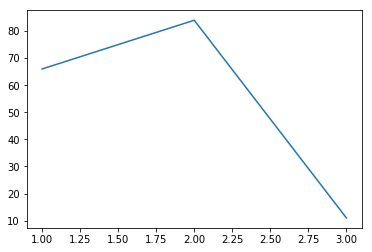

In [198]:
plot1 = plt.plot(arts['months'], arts['amount'])

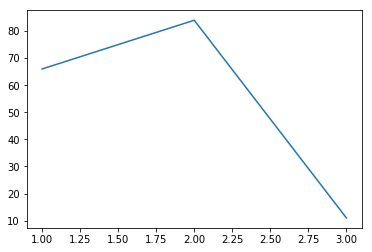

In [199]:
plot2 = plt.plot(before_arts['months'], before_arts['amount'])
